In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading and general info about dataset

In [6]:
df = pd.read_csv("./data/sales_data_sample.csv", encoding="ISO-8859-1")

In [7]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [11]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

for c in df.columns:
    df[c] = df[c].fillna('N')
    
    if (df[c].dtype == 'object'):
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   int64  
 6   STATUS            2823 non-null   int64  
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   int64  
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   int64  
 13  CUSTOMERNAME      2823 non-null   int64  
 14  PHONE             2823 non-null   int64  
 15  ADDRESSLINE1      2823 non-null   int64  
 16  ADDRESSLINE2      2823 non-null   int64  


In [13]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [16]:
X = df.drop('PRODUCTLINE', axis=1).values
y = df['PRODUCTLINE'].values

In [15]:
X

array([[1.0107e+04, 3.0000e+01, 9.5700e+01, ..., 7.6000e+01, 3.6000e+01,
        2.0000e+00],
       [1.0121e+04, 3.4000e+01, 8.1350e+01, ..., 2.8000e+01, 5.4000e+01,
        2.0000e+00],
       [1.0134e+04, 4.1000e+01, 9.4740e+01, ..., 1.7000e+01, 1.1000e+01,
        1.0000e+00],
       ...,
       [1.0386e+04, 4.3000e+01, 1.0000e+02, ..., 2.5000e+01, 1.3000e+01,
        1.0000e+00],
       [1.0397e+04, 3.4000e+01, 6.2240e+01, ..., 5.9000e+01, 5.0000e+00,
        2.0000e+00],
       [1.0414e+04, 4.7000e+01, 6.5520e+01, ..., 7.4000e+01, 3.2000e+01,
        1.0000e+00]])

In [17]:
y

array([1, 1, 1, ..., 3, 3, 3])

In [19]:
len(df['PRODUCTLINE'].unique())

7

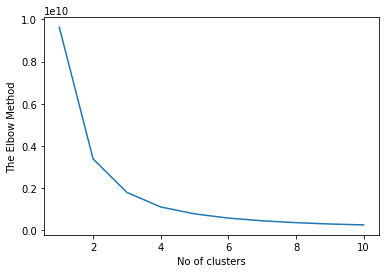

In [24]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", random_state=1)
    km.fit(X)
    
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)

plt.xlabel('No of clusters')
plt.ylabel('The Elbow Method')
plt.show()

k should be selected from where the wcss values almost starts becoming flat(in graph).

Here it means that k = 4

## Training the dataset

In [27]:
km = KMeans(n_clusters=4, init="k-means++", random_state=1)
y_means = km.fit_predict(X)

In [28]:
print(y_means)

[0 0 0 ... 1 2 0]


In [29]:
print(km.cluster_centers_)

[[1.02563520e+04 3.51268437e+01 9.03024779e+01 6.59685349e+00
  3.43589367e+03 1.14822026e+02 4.76696165e+00 2.71484759e+00
  7.07374631e+00 2.00379843e+03 1.03670600e+02 5.60639135e+01
  4.71691249e+01 4.35762045e+01 4.97679449e+01 4.91937070e+00
  3.75604720e+01 5.32055064e+00 3.28613569e+01 1.20619469e+01
  1.72861357e+00 4.00363815e+01 3.62959685e+01 1.23107178e+00]
 [1.02575893e+04 4.07607143e+01 9.95566607e+01 6.25892857e+00
  5.30472316e+03 1.15217857e+02 4.81071429e+00 2.73035714e+00
  7.11964286e+00 2.00380536e+03 1.27142857e+02 4.08625000e+01
  4.63607143e+01 4.23410714e+01 4.94089286e+01 4.91785714e+00
  3.79785714e+01 5.49821429e+00 3.34821429e+01 1.22107143e+01
  1.72500000e+00 3.91089286e+01 3.64035714e+01 1.00000000e+00]
 [1.02589561e+04 2.98844317e+01 6.56257784e+01 6.62846227e+00
  1.89010368e+03 1.18268386e+02 4.79083095e+00 2.72492837e+00
  7.13276027e+00 2.00381662e+03 7.35272206e+01 6.33428844e+01
  4.50649475e+01 4.35377268e+01 4.84393505e+01 4.86341929e+00
  3.82